In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
data = pd.read_csv('C:/temp/Wholesalecustomersdata.csv')

data.fillna(method ='ffill', inplace = True) 
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Preprocessing the data to make it visualizable 
  
# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 3) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3'] 
  
X_principal.head() 


,P1,P2,P3
0,0.808828,-0.381932,0.121907
1,0.914432,-0.401807,-0.005064
2,0.659273,-0.173878,0.168288
3,-0.648142,-0.155067,0.367957
4,0.562708,-0.107969,0.639885


In [ ]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 3, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal)


C:\Users\w\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


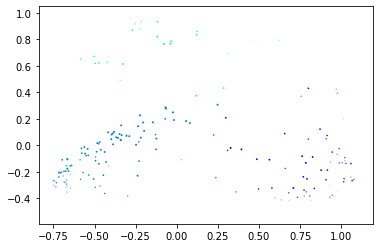

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'], X_principal['P3'],
           c = SpectralClustering(n_clusters = 3, affinity ='rbf') .fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 


In [ ]:
# Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors', n_neighbors=10) 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(X_principal)


C:\Users\w\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


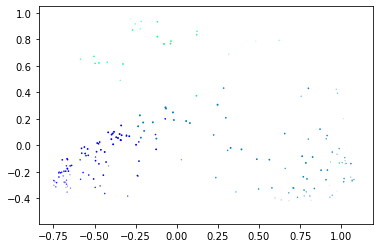

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  X_principal['P3'],
           c = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors') .fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

In [ ]:
# prepare data for kmeans
x = data.iloc[:, [2,3,4]]
x  = np.array(x)
print(x)

[[12669  9656  7561]
 [ 7057  9810  9568]
 [ 6353  8808  7684]
 ...
 [14531 15488 30243]
 [10290  1981  2232]
 [ 2787  1698  2510]]


C:\Users\w\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


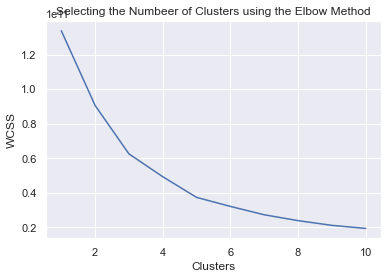

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
import seaborn as sns 
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

[[ 4913.35761589  2431.1986755   2988.88741722]
 [ 9068.         15849.6        44819.6       ]
 [44408.10526316  3175.36842105  4057.47368421]
 [ 4166.2278481   7870.6835443  11709.48101266]
 [15776.13        2733.71        3772.75      ]
 [85779.66666667 12503.66666667 12619.66666667]
 [ 5705.86111111 15872.36111111 22603.13888889]
 [16117.         46197.         92780.        ]
 [33310.6        49299.8        37894.4       ]
 [26755.          6021.92682927  7558.58536585]]
[2 2 2 2 4 2 2 2 2 0 2 2 4 4 4 2 0 2 4 2 4 2 4 3 4 4 2 4 0 1 4 2 4 4 2 2 4
 4 0 1 4 4 0 0 2 0 0 3 2 0 2 2 1 0 4 2 0 2 4 2 2 3 2 0 2 0 2 4 2 2 4 4 2 4
 2 4 2 0 2 2 2 0 2 4 2 3 3 1 2 4 2 2 0 2 0 2 2 2 2 2 2 0 2 1 4 4 2 0 2 0 2
 0 4 4 4 2 2 2 4 2 4 2 2 2 1 1 4 4 2 1 2 2 4 2 2 2 2 2 4 2 4 4 1 2 4 0 2 2
 2 4 4 2 4 2 2 0 0 4 2 0 2 2 4 0 2 0 2 2 2 2 0 0 2 0 2 2 1 2 2 2 2 1 2 3 2
 2 2 2 2 0 4 2 2 0 2 4 4 2 2 2 0 0 4 2 2 0 2 2 2 0 4 3 2 2 2 0 0 4 0 2 4 2
 2 2 2 2 4 2 2 2 2 2 4 2 4 2 2 4 2 1 4 4 4 2 2 0 2 2 4 2 2 0 2 4 2 4 

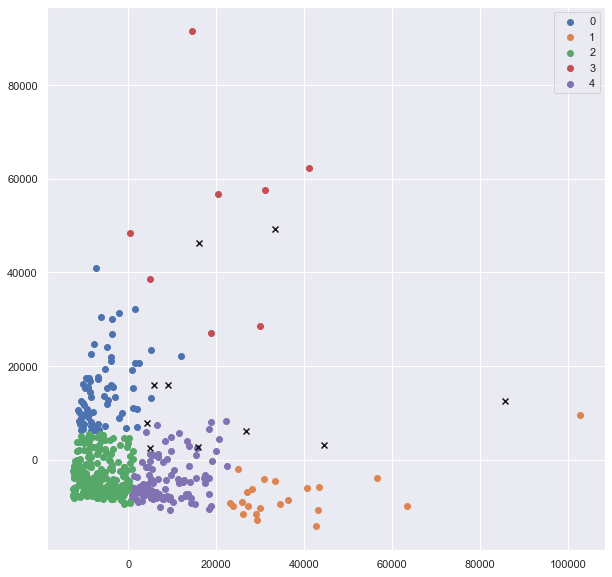

In [ ]:
# using pca to reduce demention
pca = PCA(2)
data1 = pca.fit_transform(x)
#print(data)
centers = np.array(kmeans.cluster_centers_)
print(centers)
# cluster number determined by ellbow. graph shows it's at 5
kmeans = KMeans(n_clusters = 5, init = "k-means++")
# group close numbers into one label, example 0.9, 1.2, 1.3 all to 1
label = kmeans.fit_predict(data1)
print(label)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
print(uniq)
for i in uniq:
       plt.scatter(data1[label == i , 0] , data1[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
pca = PCA(n_components = 2)
X_principal1 = pca.fit_transform(X_normalized)
X_principal1= pd.DataFrame(X_principal1)
X_principal1.columns = ['P1', 'P2']
print(X_principal1.head())

         P1        P2
0  0.808828 -0.381932
1  0.914432 -0.401807
2  0.659273 -0.173878
3 -0.648142 -0.155067
4  0.562708 -0.107969


In [ ]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.029, min_samples =10).fit(X_principal1)
print(db_default)
labels = db_default.labels_
print(labels)

DBSCAN(eps=0.029, min_samples=10)
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1  2  0 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1  2 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1  2 -1 -1 -1 -1  2  0 -1 -1  2
 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0  0  0 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0  0 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1
  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  0 -1
 -1 -1  1  0  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -

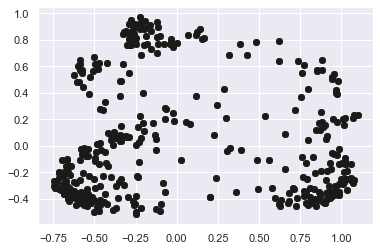

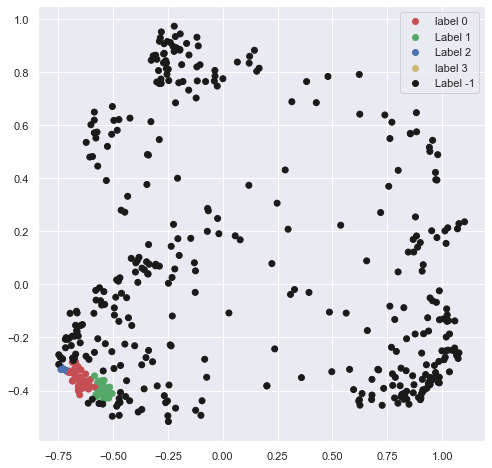

In [ ]:
# Building the label to colour mapping
colours = {}
colours[0] = "r"
colours[1] = "g"
colours[2] = "b"
colours[3] = "y"
colours[-1] = "k"
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal1['P1'], X_principal1['P2'], color ='r');
g = plt.scatter(X_principal1['P1'], X_principal1['P2'], color ='g');
b = plt.scatter(X_principal1['P1'], X_principal1['P2'], color ='b');
y = plt.scatter(X_principal1['P1'], X_principal1['P2'], color ='y');
k = plt.scatter(X_principal1['P1'], X_principal1['P2'], color ='k');
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize=(8,8))
                     
plt.scatter(X_principal1['P1'], X_principal1['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, y, k),( 'label 0', 'Label 1', 'Label 2', 'label 3', 'Label -1'))
plt.show()

[ 1  0 -1  3 -1 -1 -1  1 -1 -1  0 -1 -1 -1 -1  2  0 -1 -1 -1 -1  2 -1 -1
 -1 -1  2  2 -1 -1 -1  2 -1  4  2  1 -1 -1 -1 -1 -1 -1  0 -1  1 -1 -1 -1
  0 -1  2 -1 -1  0 -1 -1 -1  0  2 -1 -1 -1 -1 -1  2 -1 -1 -1 -1  2 -1 -1
 -1 -1  1 -1 -1 -1  2 -1  2  0  0  3 -1 -1 -1 -1 -1 -1  2 -1 -1 -1  0 -1
 -1  2  2  3 -1 -1  1 -1  2  2  0 -1 -1 -1  2 -1 -1  2  3  2  2 -1 -1  2
  3  2  2 -1  4 -1 -1 -1 -1  4  3  2  2  2  2  2 -1 -1 -1  2 -1 -1 -1 -1
 -1 -1  2  2  2 -1  2  2  3 -1  2 -1  0  3  1  0  1  2  2 -1  1 -1 -1 -1
  2  2  0 -1 -1 -1  2  0 -1 -1  2  2 -1 -1 -1 -1 -1  2  2 -1  0  0 -1  2
  2 -1  2 -1 -1 -1 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1
 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1
 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1  5  5 -1
 -1 -1 -1 -1 -1 -1  5 -1 -1  4  2  2 -1  4  3 -1  2 -1 -1 -1 -1  4  2 -1
  2  4  2  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

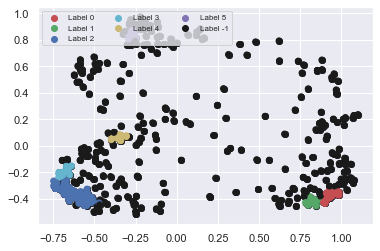

In [ ]:
db = DBSCAN(eps = 0.038, min_samples = 8).fit(X_principal1)
labels1 = db.labels_
print(labels1)
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]
r = plt.scatter(
        X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[0])
g = plt.scatter(
        X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[1])
b = plt.scatter(
        X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[2])
c = plt.scatter(
        X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[3])
y = plt.scatter(
        X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[4])
m = plt.scatter(
        X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[5])
k = plt.scatter(
        X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[6])
#plt.figure(figsize =(9, 9))
plt.scatter(X_principal1['P1'], X_principal1['P2'], c = cvec)
plt.legend((r, g, b, c, y, m, k),
           ('Label 0', 'Label 1', 'Label 2', 'Label 3 ', 'Label 4',
            'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()